<h1>SEATTLE WEATHER DATA ANALYSIS</h1>

<img src = "https://img.freepik.com/free-vector/sun-moon-disks-clear-clouds-with-rain-snow-icons_1441-2856.jpg" width = 500 height = 100 alt = "Weather types">

<h1>Overview of the Dataset</h1>

The dataset is a Time Series data of different climatic variables (precipitation, temperature and wind), and the resulting weather for that day. It is a dataset based in Seattle.

**Explanation of Key Items:**

**Time Series Data**: It is typically a kind of data where data points are collected or recorded at specific time intervals. The process of analysing this is called Time Series Analysis (TSA).

**Precipitation**: It is a form of water e.g. water, snow, etc that falls from the atmosphere to the earth's surface. (Unit is Inches).

**Temperature**: It is the measure of the hotness or coldness of a variable. In this data, the variable is atmostphere. (Unit is Fahrenheit).

**Wind**: It is the movement of air from areas of high pressure to areas of low pressure, caused by differences in temperature and atmospheric pressure. (Unit is Miles/Hour).

**Weather**

The different weather present (i.e. when you do unique values on the weather column) are: 'drizzle', 'rain', 'sun', 'snow', 'fog'.

**Brief Explanation:**

<table>
    <th>S/N</th><th>Weather</th><th>Description</th>
    <tr><td>1</td><td>Drizzle</td><td>A type of light rain characterized by very small, fine droplets of water that fall from the sky.</td></tr>
    <tr><td>2</td><td>Rain</td><td>It occurs when water vapor in the atmosphere condenses into liquid water and becomes heavy enough to overcome air resistance and fall to the ground.</td></tr>
    <tr><td>3</td><td>Sun</td><td>The primary source of energy that influences the Earth's atmosphere and climate.</td></tr>
    <tr><td>4</td><td>Snow</td><td>It is a frozen precipitation that forms when water vapor in the atmosphere freezes into ice crystals and falls to the ground as flakes.</td></tr>
    <tr><td>5</td><td>Fog</td><td>It is a thick cloud of water vapor near the ground, reducing visibility and often forming when moist air cools and condenses into tiny water droplets.</td></tr>
</table>


<h1>Import Relevant Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
#Truncate Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
#Models
import xgboost
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
#Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Evaluation metrics
from sklearn.metrics import mean_absolute_error

#LabelEncoding for Categorical Variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Cross validation
from sklearn.model_selection import StratifiedKFold

#Metrics
from sklearn.metrics import accuracy_score

#Model Splitting
from sklearn.model_selection import train_test_split

<h1>Data Inspection</h1>

In [2]:
# df = pd.read_csv("/kaggle/input/seattle-weather/seattle-weather.csv")
df = pd.read_csv("seattle-weather.csv")

In [3]:
#Check the DataFrame Columns
print("Columns:\n", df.columns)

#Check for null values
print("\nNull Values?\n", df.isnull().sum())

#Check the shape
print("\nShape of Data:\n",df.shape)

#Check the Data Types
print("\nData Types:\n", df.dtypes)

#Descriptive Statistics of the data: mean, median, count, etc
print("\nDescriptive Statistics:\n", df.describe())

Columns:
 Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

Null Values?
 date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

Shape of Data:
 (1461, 6)

Data Types:
 date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

Descriptive Statistics:
        precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.30000

In [4]:
#For Time Series Analysis, the date is usually the index. We implement this:

df1 = df.set_index("date")

#Because the index is an object, we have to convert it to a datetime to help us extract meaningful
#values

df1.index = pd.to_datetime(df1.index)

In [5]:
print("Head of Data\n", df1.head())
print("\nTail of Data\n", df1.tail())

print("\nThe data starts from {} and ends at {}".format(df1.index.min(), df1.index.max()))

Head of Data
             precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain

Tail of Data
             precipitation  temp_max  temp_min  wind weather
date                                                       
2015-12-27            8.6       4.4       1.7   2.9    rain
2015-12-28            1.5       5.0       1.7   1.3    rain
2015-12-29            0.0       7.2       0.6   2.6     fog
2015-12-30            0.0       5.6      -1.0   3.4     sun
2015-12-31            0.0       5.6      -2.1   3.5     sun

The data starts from 2012-01-01 00:00:00 and ends at 2015-12-31 00:00:00


<h1>BASIC VISUALISATION OF CLIMATE VARIABLES</h1>

<h2>FEATURES PLOT</h2>

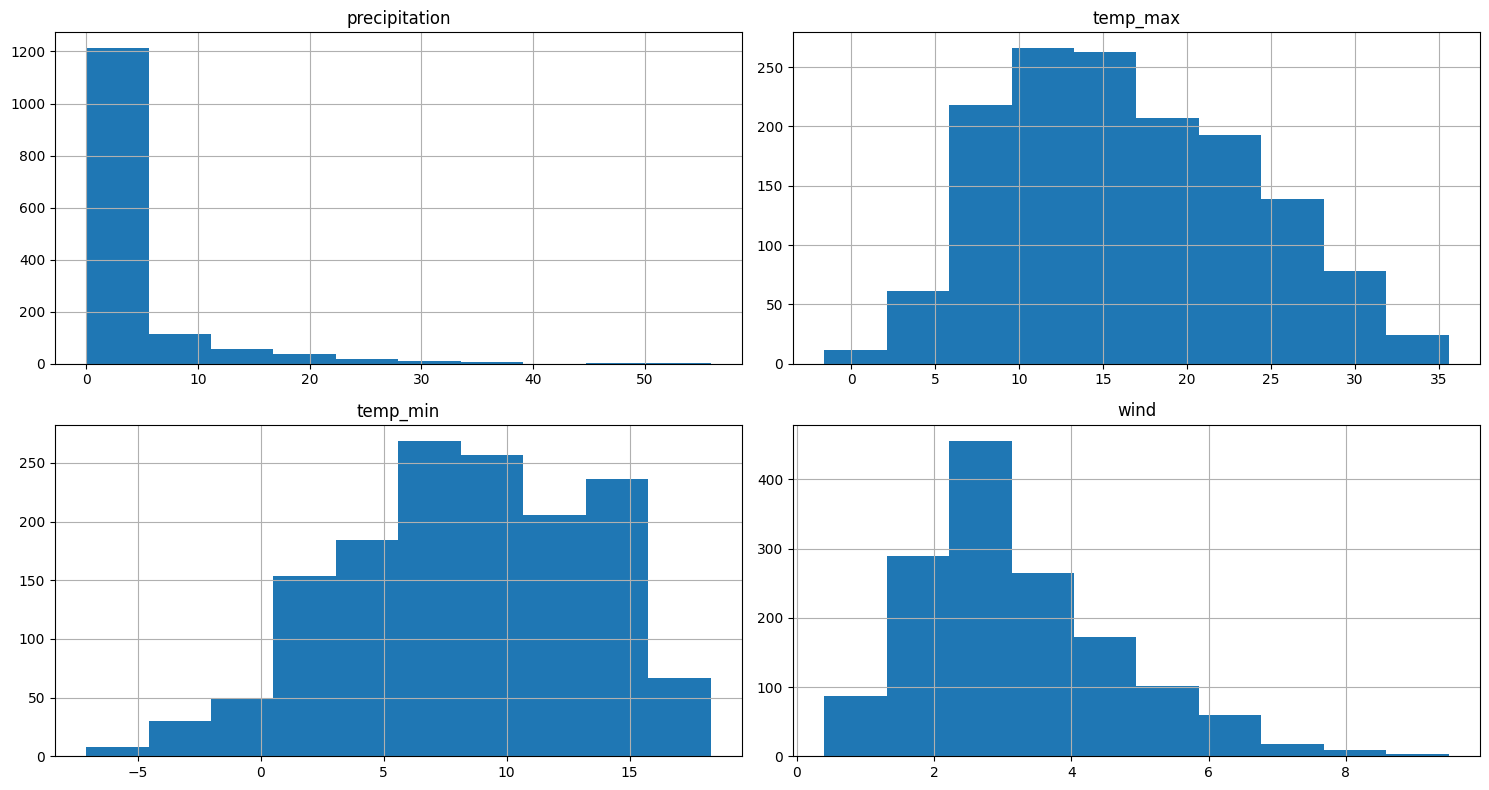

In [6]:
#Checking the distribution of each variable in the dataset
fig, ax = plt.subplots(figsize = (15, 8))

num_df = df1.select_dtypes("number") #Dropping the weather column, since it's categorical

num_df.hist(ax = ax) #Using an histogram to see the distribution of each variable in our dataset

plt.tight_layout();

#precipitation is highly skewed, because it doesn't occur frequently, it's based on seasons
#Let's investigate further on the other cell

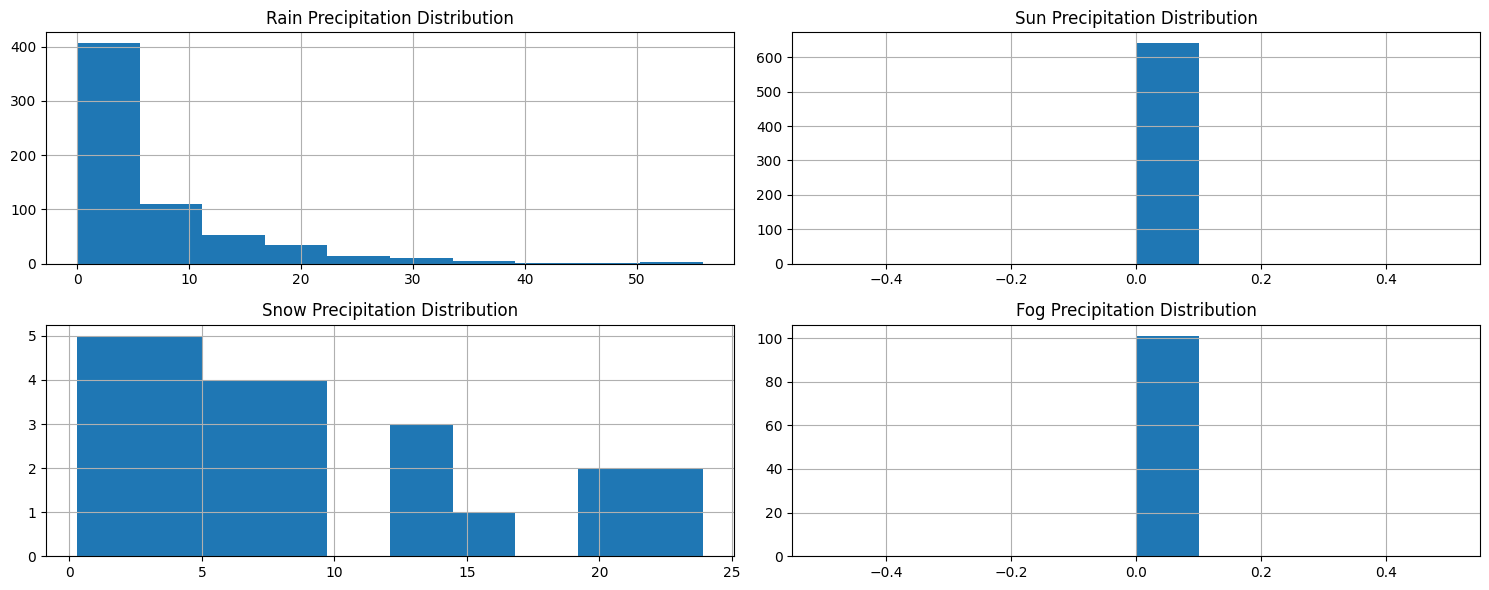

In [7]:
fig, ax = plt.subplots(2,2, figsize = (15, 3 * 2))

df1[df1.weather == 'rain']['precipitation'].hist(ax = ax[0,0])
ax[0,0].set_title("Rain Precipitation Distribution")
df1[df1.weather == 'sun']['precipitation'].hist(ax = ax[0,1])
ax[0,1].set_title("Sun Precipitation Distribution")
df1[df1.weather == 'snow']['precipitation'].hist(ax = ax[1,0])
ax[1,0].set_title("Snow Precipitation Distribution")
df1[df1.weather == 'fog']['precipitation'].hist(ax = ax[1,1])
ax[1,1].set_title("Fog Precipitation Distribution")

plt.tight_layout();

#We see that during snow weather, the precipitation is more balanced

<h2>TIME SERIES PLOTS</h3>

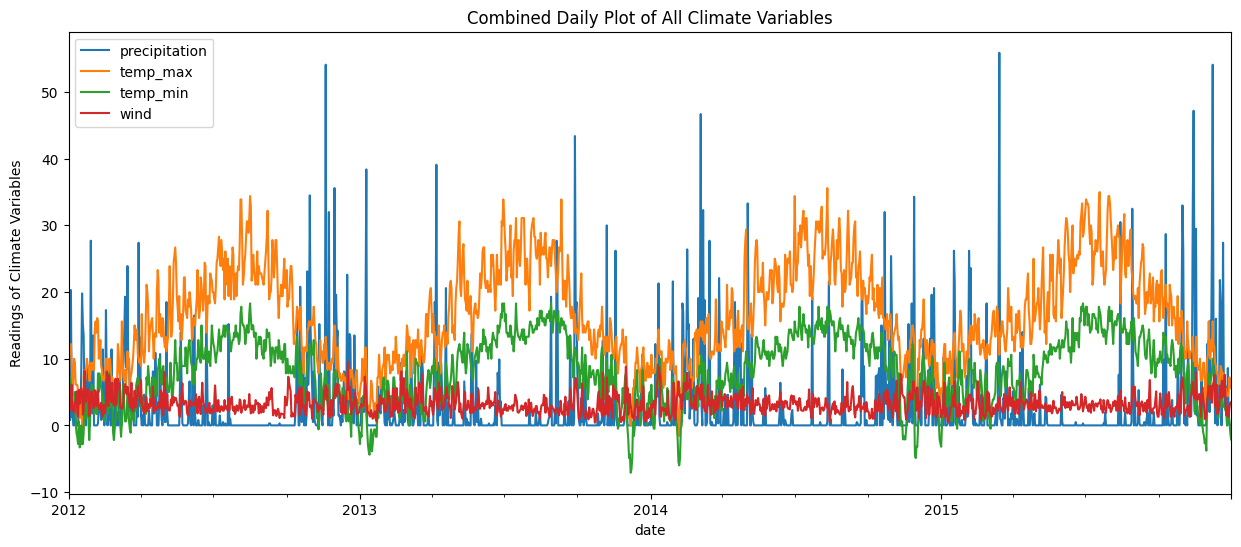

In [8]:
fig, ax = plt.subplots(figsize = (15, 6))
df1.select_dtypes("number").plot(ax = ax, ylabel = "Readings of Climate Variables",
                                 title="Combined Daily Plot of All Climate Variables");

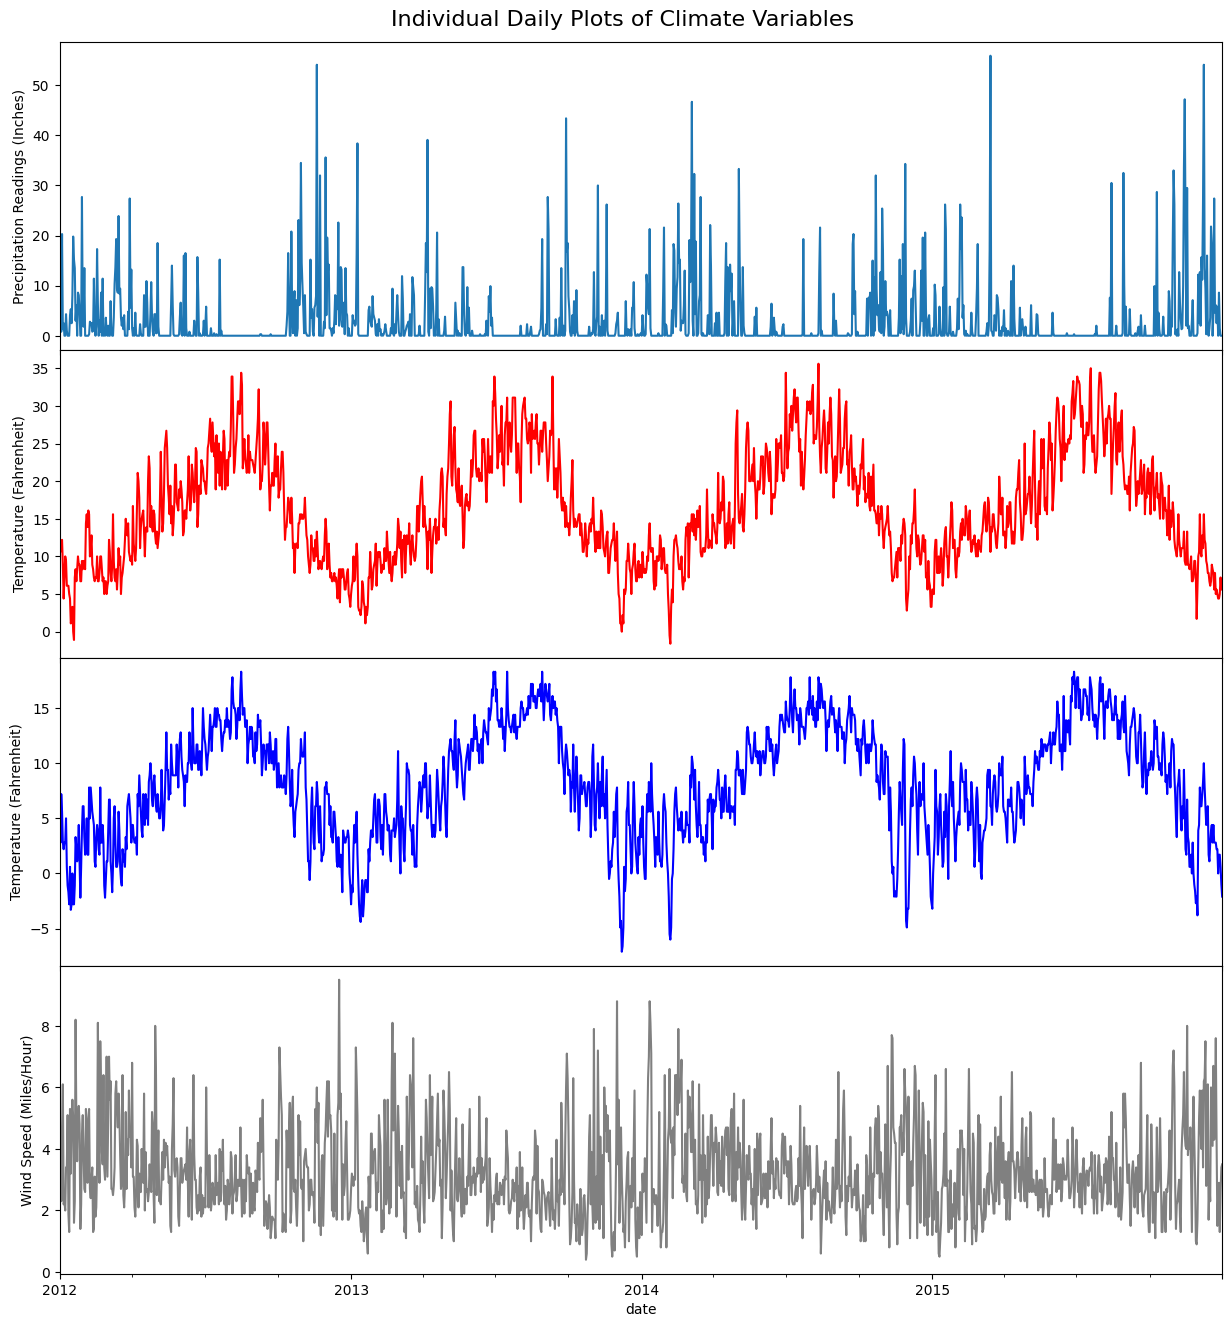

In [9]:
#Since the Climate Variables, all have different Units, it's best we do an individual Plot
#showing how each variable varies with time

fig, ax = plt.subplots(nrows = 4, ncols = 1, sharex = True, figsize = (15, 4 * 4))

df1['precipitation'].plot(ax = ax[0], ylabel = "Precipitation Readings (Inches)")
df1['temp_max'].plot(ax = ax[1], color = 'red', ylabel = "Temperature (Fahrenheit)")
df1['temp_min'].plot(ax = ax[2], color = 'blue', ylabel = "Temperature (Fahrenheit)")
df1['wind'].plot(ax = ax[3], color = 'grey', ylabel = "Wind Speed (Miles/Hour)")

plt.subplots_adjust(wspace=0, hspace=0)

fig.suptitle("Individual Daily Plots of Climate Variables", y = 0.9, fontsize = 16);

In [10]:
#It is observed above that the readings are sort of cluttered together
#Let us visualize the weekly readings

df2 = df1.copy()

df2['weekly_precipitation'] = df2['precipitation'].rolling(7).mean() #7 for days in a week
df2['weekly_temp_max'] = df2['temp_max'].rolling(7).mean()
df2['weekly_temp_min'] = df2['temp_min'].rolling(7).mean()
df2['weekly_wind'] = df2['wind'].rolling(7).mean()

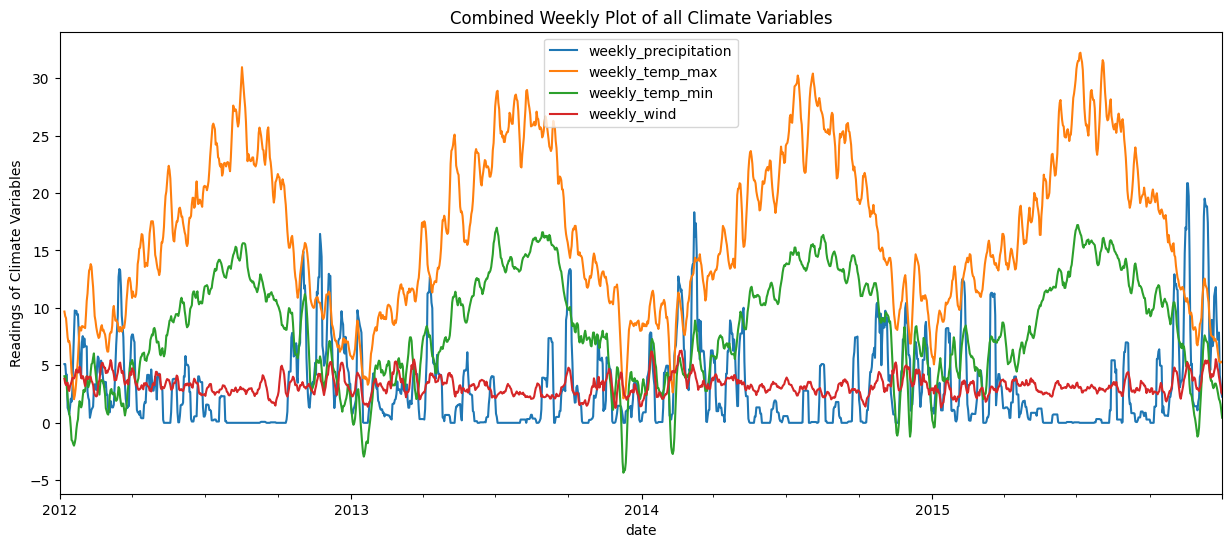

In [11]:
#Weekly Readings Plot
fig, ax = plt.subplots(figsize = (15, 6))
for col in df2.columns:
    if col.startswith('weekly'):
        df2[col].plot(ax = ax, label = col)

ax.set_title("Combined Weekly Plot of all Climate Variables")
ax.set_ylabel("Readings of Climate Variables")
ax.legend();

#We can see that It is possible to Read it effectively under this scenario

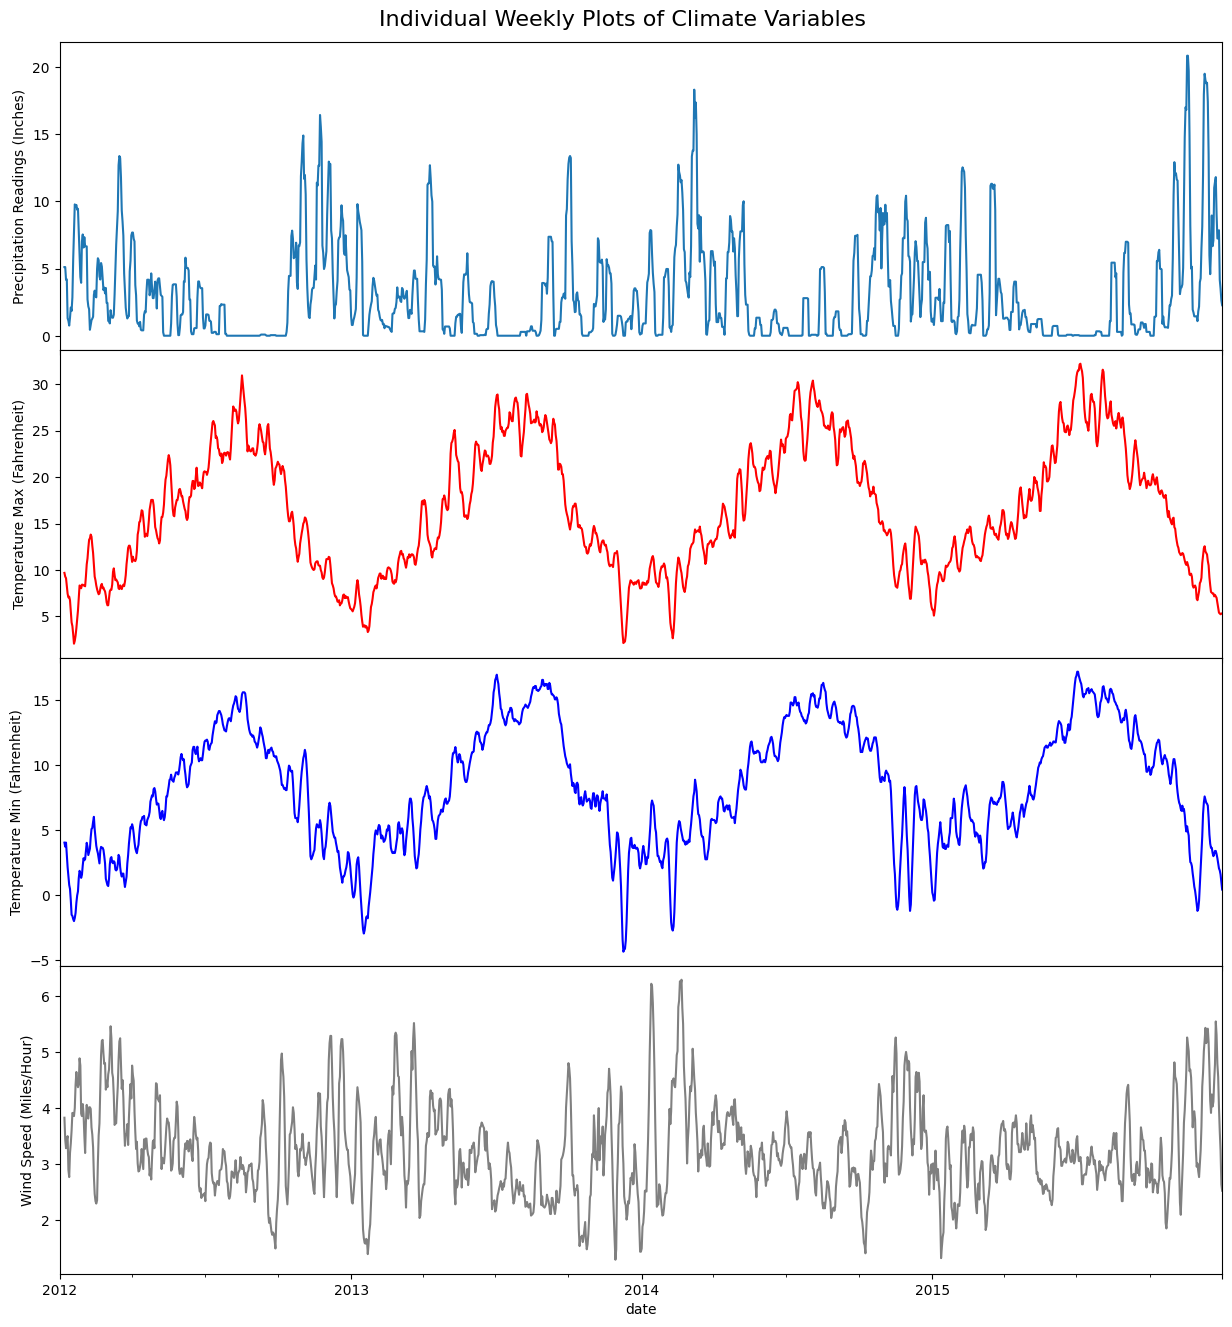

In [12]:
#Because of the Cluttering, let us visualise the weekly readings of each variable

#Extract the columns that starts with the term weekly
weekly_columns = [col for col in df2.columns if col.startswith('weekly')]


#Since the Climate Variables, all have different Units, it's best we do an individual Plot
#showing how each variable varies with time

fig, ax = plt.subplots(nrows = 4, ncols = 1, sharex = True, figsize = (15, 4 * 4))

winter = [
    "2012-12-01", "2013-01-01", "2013-02-01", 
    "2013-12-01", "2014-01-01", "2014-02-01", 
    "2014-12-01", "2015-01-01", "2015-02-01", 
    "2015-12-01"
]

df2['weekly_precipitation'].plot(ax = ax[0], ylabel = "Precipitation Readings (Inches)")
df2['weekly_temp_max'].plot(ax = ax[1], color = 'red', ylabel = "Temperature Max (Fahrenheit)")
df2['weekly_temp_min'].plot(ax = ax[2], color = 'blue', ylabel = "Temperature Min (Fahrenheit)")
df2['weekly_wind'].plot(ax = ax[3], color = 'grey', ylabel = "Wind Speed (Miles/Hour)")


plt.subplots_adjust(wspace=0, hspace=0)

fig.suptitle("Individual Weekly Plots of Climate Variables", y = 0.9, fontsize = 16);

<h3>OBSERVATION FROM TIME SERIES PLOT</h3>
<ul>
    <li>On some certain days, there are peak values of the climate variables and troph values. This situation is evident because of the different weather we have in our data frame.</li>
    <li>The precipitation readings are usually higher around December, this is because the weather during that period is usually snow, hence the excess precipitation</li>
    <li>For temperature (min and max) it has peak values around the month of July</li>
</ul>

<h1>TASK 1:</h1>
<h2>Can we create an interaction between climate features to see the features that separate the dataset into the appropriate weather clusters?</h2>

In [13]:
#For this task: We want to be able to cluster our dataset into relevant weather by visualising
#their patterns.
#Do the weather, i.e. sun, rain, drizzle have a kind of pattern in a dataset, let us visualise
#this

In [14]:
#create another copy of our data
df3 = df1.copy()

In [15]:
df3['weather'].value_counts(normalize = True)
#see the representation of each weather in our dataset

weather
rain       0.438741
sun        0.438056
fog        0.069131
drizzle    0.036277
snow       0.017796
Name: proportion, dtype: float64

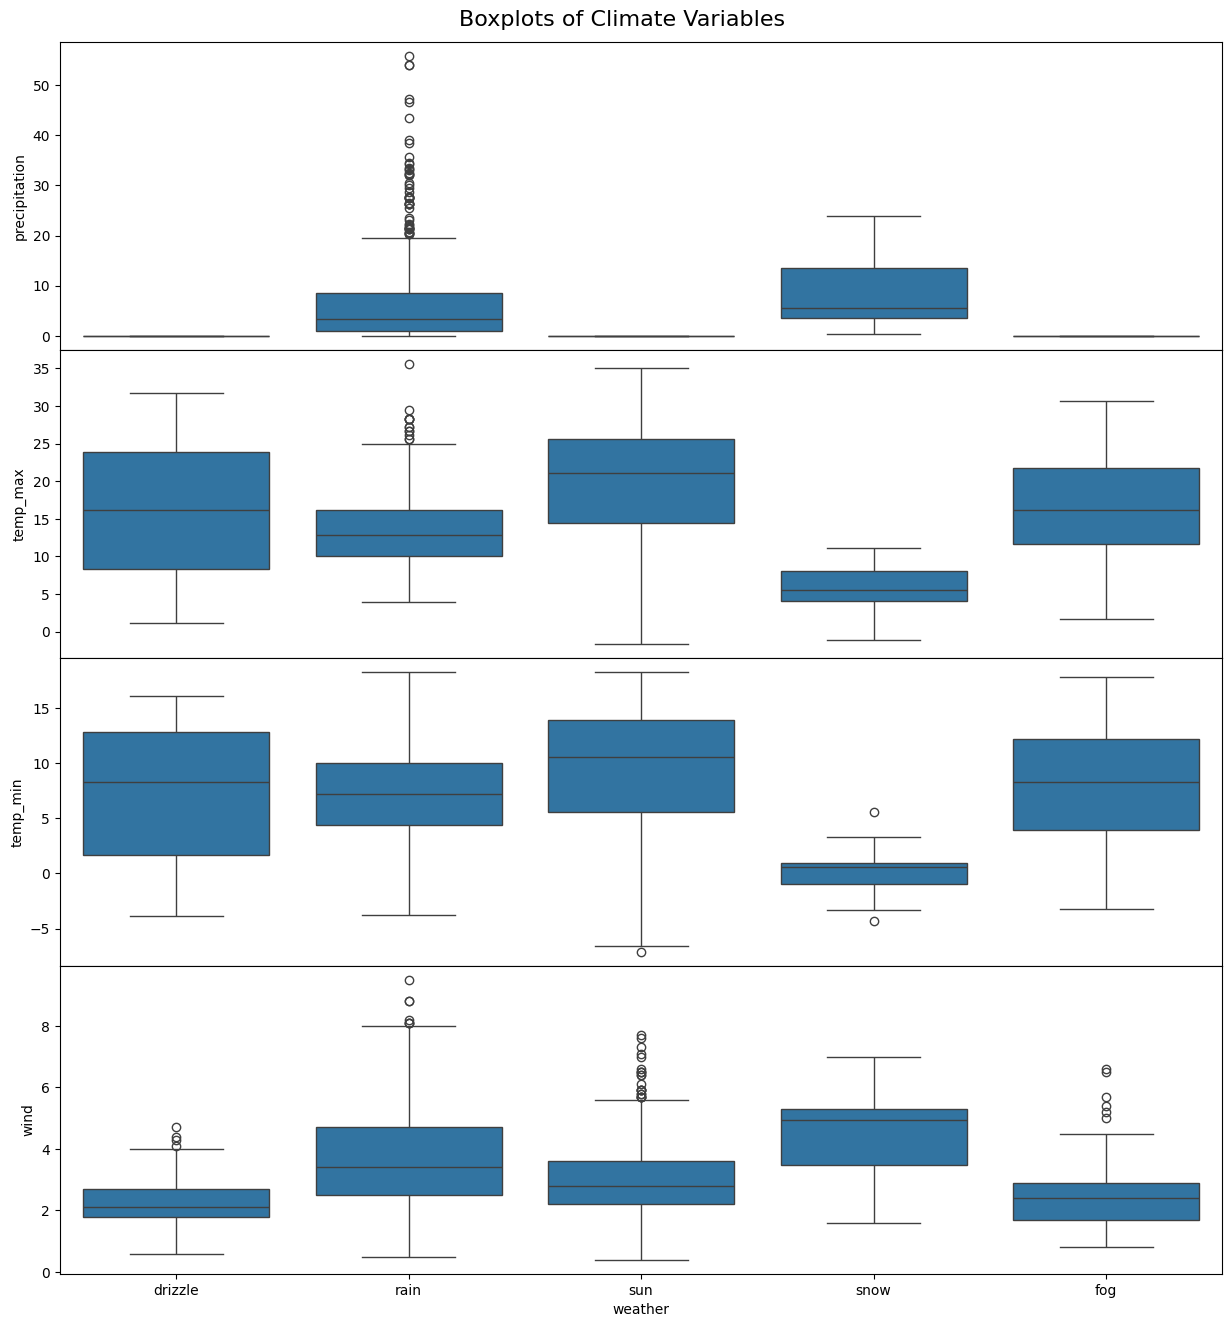

In [16]:
#Let's see how the average temperature varies with weather alright
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 4 * 4), sharex = True)

sns.boxplot(x = 'weather', y = 'precipitation', data = df3, ax = ax[0])
sns.boxplot(x = 'weather', y = 'temp_max', data = df3, ax = ax[1])
sns.boxplot(x = 'weather', y = 'temp_min', data = df3, ax = ax[2])
sns.boxplot(x = 'weather', y = 'wind', data = df3, ax = ax[3])

plt.subplots_adjust(wspace=0, hspace=0)

fig.suptitle("Boxplots of Climate Variables", y = 0.9, fontsize = 16);

<h2>OBSERVATIONS FROM BOXPLOTS</h2>
<ul>
    <li>For Precipitation, rain had the highest value, in terms of quartile and mean values. This is not surprising, as rain itself is a form of precipitation and during this weather, the precipitation values ought to be higher. We also see numerous outliers, that shows days without unusual precipitaton during the rain weather. Snow also showed considerable values, as snow itself is also a form of precipitation. Others had little or no values</li>
    <li>For Min Temp and Max Temp, Sun showed higher quartile and mean values, but it didn't stand out too much as other weather e.g. drizzle, rain and fog showed considerable values as well. This is because there is always a considerable temperature readings everyday, despite the weather. It is important to see that snow showed the lowest values, this is certain, because during snow, the temperature readings is considerable lower</li>
    <li>Finally, for the Wind variable, rain and snow showed highest values. Others showed considerable values as well, because wind is sometimes independent of the weather and may result in unusual cases.</li>
</ul>

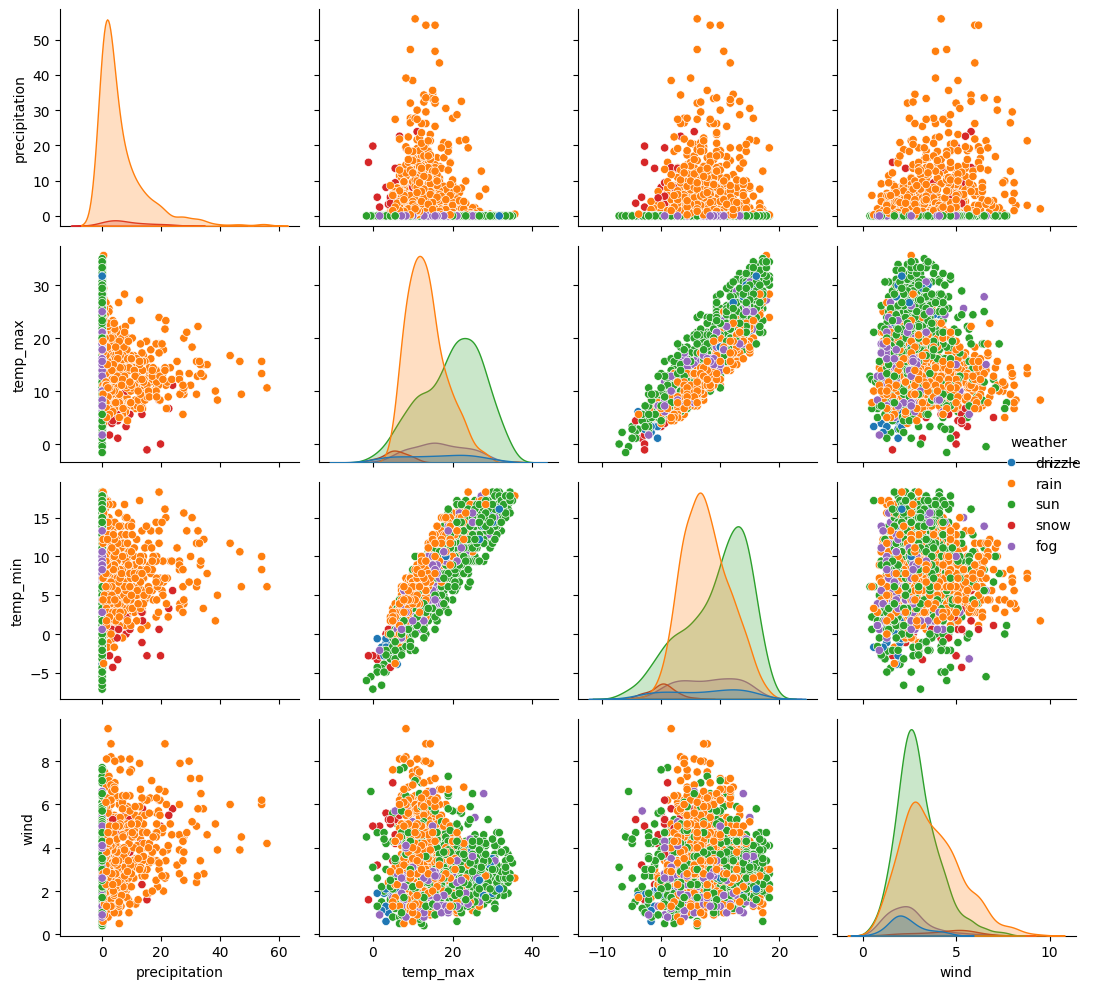

In [17]:
#Interaction between Features.
#Let us see how this features interact with themselves to determine if certain feature interaction,
#can show the particular weather patterns

sns.pairplot(df3, hue = 'weather')
plt.tight_layout();

<h2>OBSERVATIONS FROM PAIRPLOT</h2>
<ul>
    <li>Based on the plot shown above, we can see clearly that, the most distinguishing factors in determining the weather is Precipitation, as rain has more values in that regards. Also snow shows higher values than the rest as well, therefore it is evident.</li>
    <li>The second most distinguishing factor is temperature, although this is not immediately obvious, looking at the plot we see that the higher the temperature the weather is most likely to be sun, as already discussed in the boxplot illustration</li>
</ul>

<h1>TASK 2:</h1>
<h2>Can we predict the Climate Variables for future dates given past dates?</h2

In [18]:
#METHOD 1: Predicting Precipitation, Average Temperature using XGBoost

In [19]:
#Creating another copy of our dataframe

df4 = df1.copy()

In [20]:
df4.head(2)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain


In [21]:
#For this problem, the weather column is not needed and it will be dropped because:
#we are trying to predict the climate variables and not the weather

df5 = df4.drop(columns = 'weather')

In [22]:
#In order to make predictions, we will have to extract meaningful features from our index
#These features will serve as predictors for the climate variables

def create_features(df):
    df = df.copy()
    df['year'] = df.index.year #Extracts the year of the row i.e. 2012 to 2015
    df['month'] = df.index.month #Extracts the month of the row i.e. January to December
    df['dayofweek'] = df.index.dayofweek #Extracts the day of week, i.e. monday to friday
    df['day'] = df.index.day #Extracts the day of the month i.e. from 1 to 31
    df['quarter'] = df.index.quarter #Quarter 1 to Quarter 4
    df['dayofyear'] = df.index.dayofyear #1 to 365

    return df

In [23]:
df6 = create_features(df5)

In [24]:
#Let us create new dataframe based off the features

precipitation_df = df6.drop(columns = ['temp_max', 'temp_min', 'wind'])
temp_max_df = df6.drop(columns = ['precipitation', 'temp_min', 'wind'])
temp_min_df = df6.drop(columns = ['precipitation', 'temp_max', 'wind'])
wind_df = df6.drop(columns = ['precipitation', 'temp_max', 'temp_min'])

<h2>CASE 1: PRECIPITATION</h2>

<h4>To determine future precipitation Values given Past Precipation Values</h4>

In [25]:
precipitation_df.head(2)

,precipitation,year,month,dayofweek,day,quarter,dayofyear
date,,,,,,,
2012-01-01,0.0,2012,1,6,1,1,1
2012-01-02,10.9,2012,1,0,2,1,2


<h3>Visualization of Features to Target to determine relationship</h3>

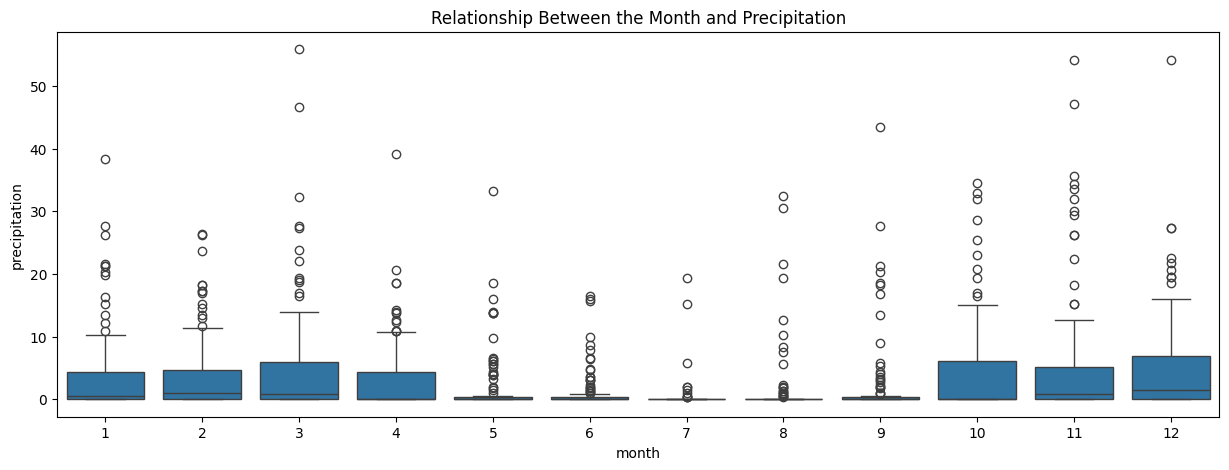

In [26]:
#RELATIONSHIP BETWEEN MONTH AND PRECIPITATION

fig, ax = plt.subplots(figsize = (15, 5))

sns.boxplot(data = precipitation_df, x = 'month', y = 'precipitation', ax = ax)
plt.title("Relationship Between the Month and Precipitation");

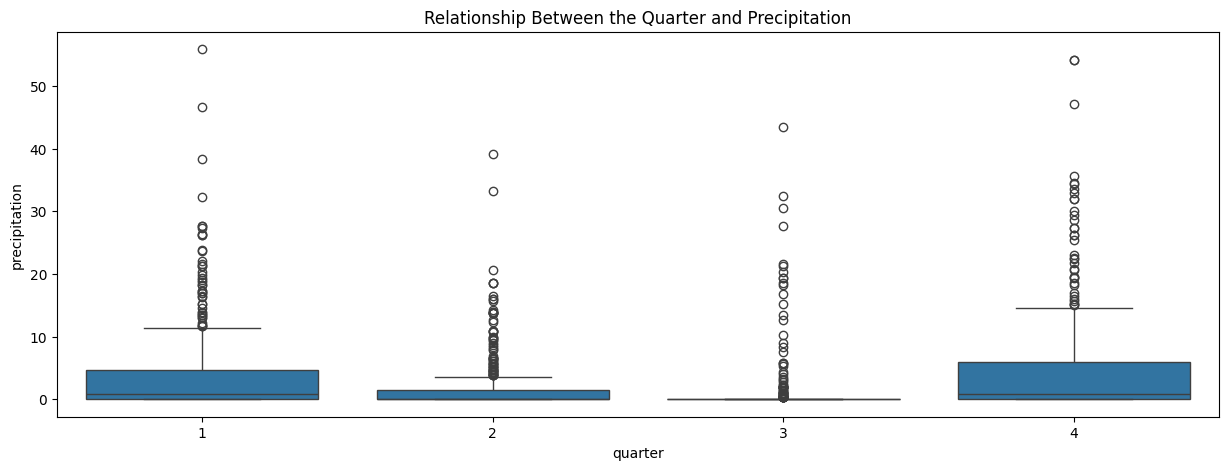

In [27]:
#RELATIONSHIP BETWEEN QUARTER AND PRECIPITATION

fig, ax = plt.subplots(figsize = (15, 5))

sns.boxplot(data = precipitation_df, x = 'quarter', y = 'precipitation', ax = ax)
plt.title("Relationship Between the Quarter and Precipitation");

<h3>SPLIT INTO FEATURES/TARGET AND TRAIN/TEST</h3>

In [28]:
target = 'precipitation'

#splitting into features and target
X = precipitation_df.drop(columns = target)
y = precipitation_df[target]

#splitting into train and test
#Let 80% of our data be train and 20% be test

cutoff = int(len(X) * 0.8)
X_train, y_train = X[:cutoff], y[:cutoff]
X_test, y_test = X[cutoff:], y[cutoff:]

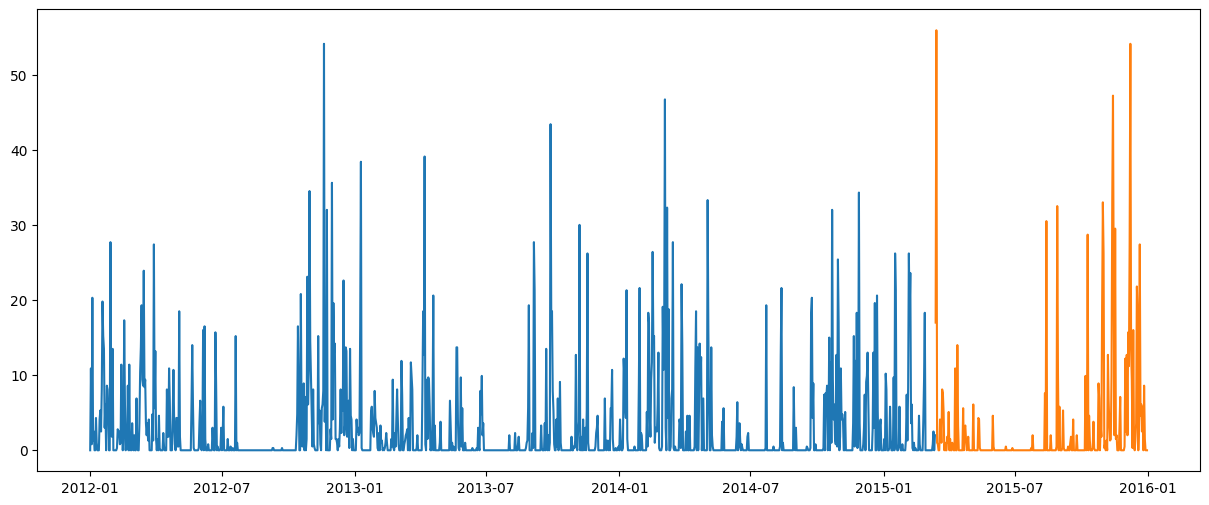

In [29]:
#Plot of train and Test

fig, ax = plt.subplots(figsize = (15, 6))

ax.plot(y_train)
ax.plot(y_test)

<h3>XGBREGRESSOR MODEL</h3>

In [30]:
#We could have used any other model, but according to experts in the field, xgb models
#offer numerous advantages over the other models,even better than deep learning models 
#for time series analysis

#we initialize a basic xgboost regressor, no hyperparameter and see what the mae will be
reg = xgboost.XGBRegressor(n_estimators = 1000, random_state = 42, 
                           early_stopping_rounds = 50, learning_rate = 0.1)

In [31]:
reg.fit(X_train, y_train, eval_set= [(X_train, y_train), (X_test, y_test)],
        verbose = 10) #Output for every 10 trees of the XGBoost

[0]	validation_0-rmse:6.16826	validation_1-rmse:7.95024
[10]	validation_0-rmse:5.30138	validation_1-rmse:8.03899
[20]	validation_0-rmse:4.78455	validation_1-rmse:8.05647
[30]	validation_0-rmse:4.50503	validation_1-rmse:8.13180
[40]	validation_0-rmse:4.21987	validation_1-rmse:8.19107
[50]	validation_0-rmse:4.00344	validation_1-rmse:8.23788
[53]	validation_0-rmse:3.96324	validation_1-rmse:8.25060


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


<h3>FEATURE IMPORTANCE</h3>

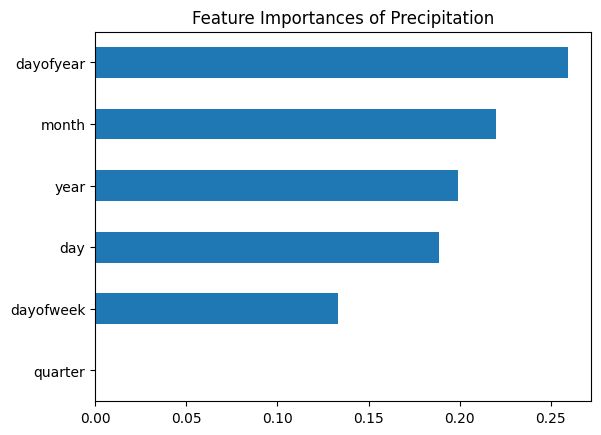

In [32]:
#it is very important we see the features that contribute more to our model's improvement

fi_df = pd.Series(reg.feature_importances_, index = X_train.columns)

fi_df.sort_values(ascending = True).plot(kind = 'barh')
plt.title("Feature Importances of Precipitation");

In [33]:
#BASELINE MODEL

#Before going ahead to make predictions on the test, it is very important we have a
#baseline mean absolute error, this will help us determine if our model improves
#this baseline model will be gotten out of the mean of the train set

y_train_mean = [y_train.mean()] * len(y_train)

baseline_mae = mean_absolute_error(y_train, y_train_mean)
print("Baseline Mean Absolute Error:", round(baseline_mae, 2))

Baseline Mean Absolute Error: 4.05


In [34]:
y_train_pred = reg.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)

print("Train Mean Absolute Error:", round(train_mae, 2))

Train Mean Absolute Error: 3.69


In [35]:
y_test_pred = reg.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Test Mean Absolute Error:", round(test_mae, 2))

Test Mean Absolute Error: 4.34


In [36]:
#Our Model obviously overfits.., with much hyperparameter tuning we may be able to fix that

In [37]:
#VISUALIZATION OF ACTUAL TEST AND PREDICTED TEST

dfs_test = pd.DataFrame(
    {
        'actual_test':y_test,
        'predicted_test':y_test_pred
    }
)

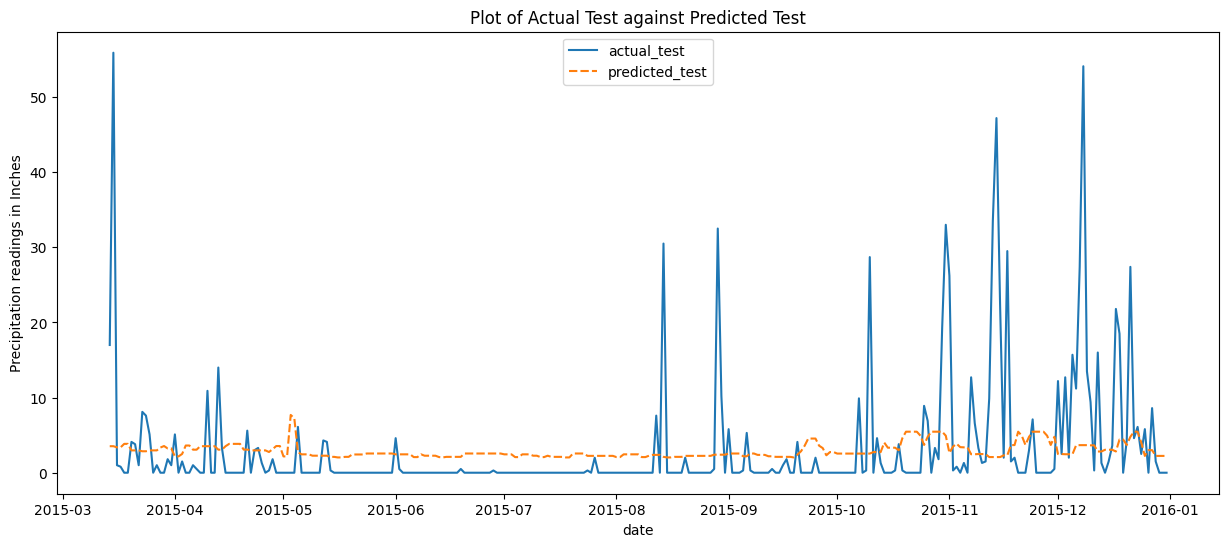

In [38]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.lineplot(dfs_test, ax = ax)
plt.ylabel("Precipitation readings in Inches")
plt.title("Plot of Actual Test against Predicted Test");

<h3>OBSERVATION ON PRECIPITATION PREDICTION</h3>
<ul>
<li>Our model had a hard time in making predictions. This may be as a result of the unusual peak values at some certain points.</li>
<li>Quarter was not an important feature in determining the precipitation. The most important feature was dayofyear</li>
<ul>

<h2>CASE 2: TEMPERATURE</h2>

<h4>To determine future  Values given Past Temperature Values</h4>

In [39]:
#As we have seen previously, the min and max temperature have the same pattern
#it's best we combine them as average temperature and make the analysis on them

In [40]:
#let's get an average temperature column from our dataframe

avg_temp_df = temp_min_df.copy()

avg_temp_df['temp_max'] = temp_max_df['temp_max']

avg_temp_df['avg_temp'] = round((avg_temp_df['temp_max'] + avg_temp_df['temp_min'])/2, 2)

avg_temp_df.drop(columns = ['temp_min', 'temp_max'], inplace = True)

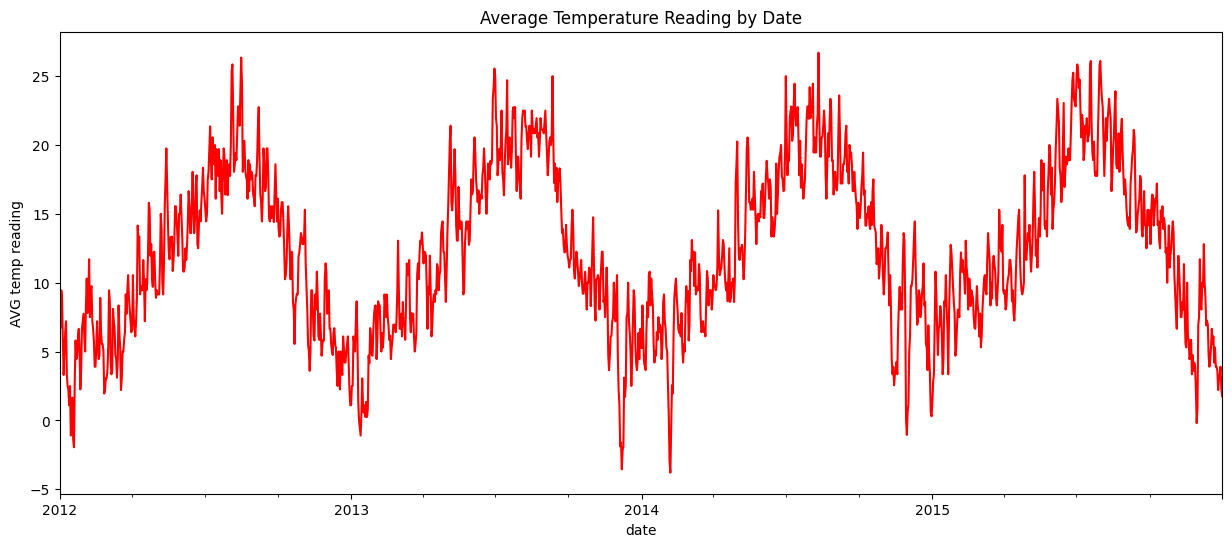

In [41]:
#let's see the plot of avg_temp_df

fig, ax = plt.subplots(figsize = (15, 6))

avg_temp_df['avg_temp'].plot(ax = ax, color = 'red', ylabel = 'AVG temp reading',
                             title = "Average Temperature Reading by Date");

<h3>Visualization of Features to Target to determine relationship</h3>

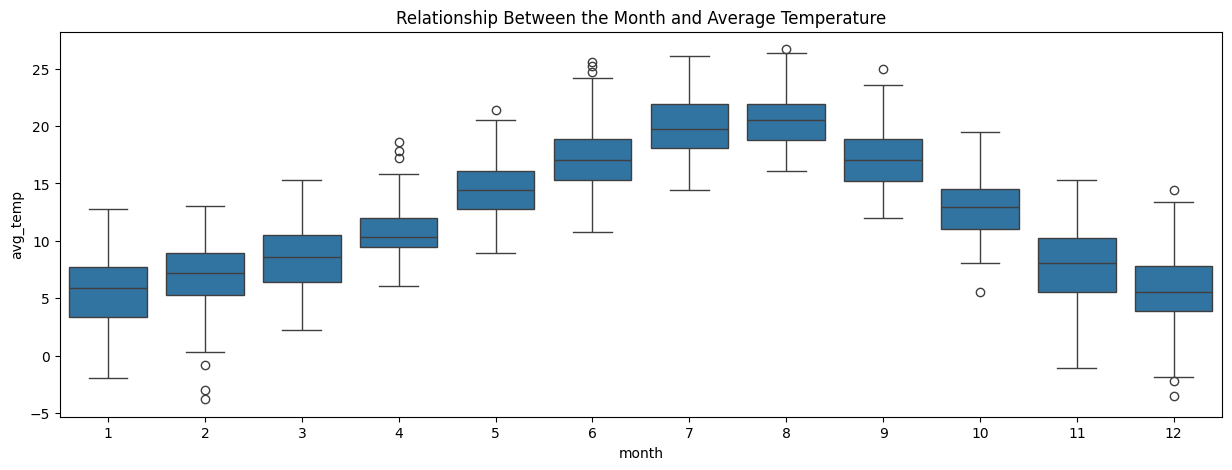

In [42]:
#RELATIONSHIP BETWEEN MONTH AND AVG-TEMP

fig, ax = plt.subplots(figsize = (15, 5))

sns.boxplot(data = avg_temp_df, x = 'month', y = 'avg_temp', ax = ax)
plt.title("Relationship Between the Month and Average Temperature");

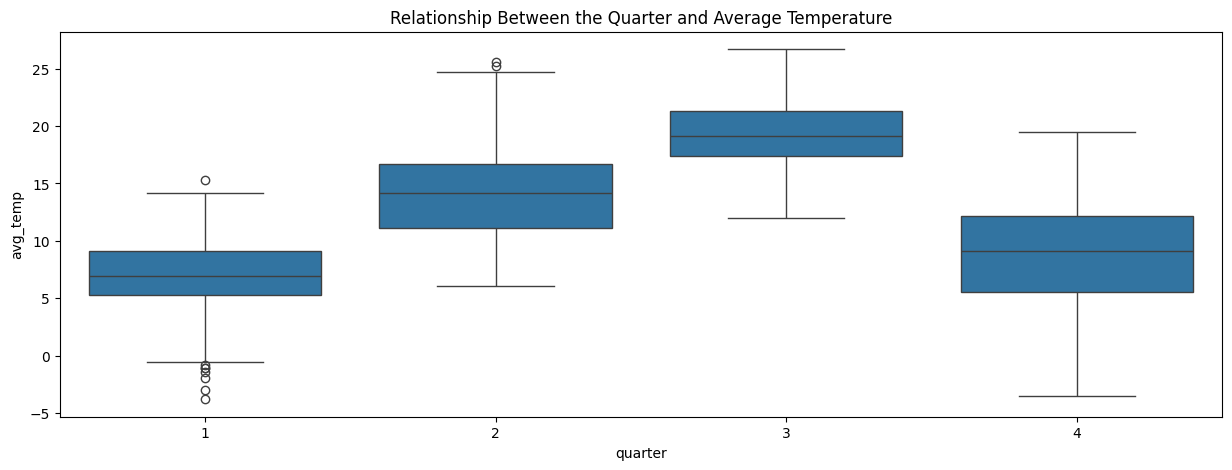

In [43]:
#RELATIONSHIP BETWEEN QUARTER AND AVERAGE TEMPERATURE

fig, ax = plt.subplots(figsize = (15, 5))

sns.boxplot(data = avg_temp_df, x = 'quarter', y = 'avg_temp', ax = ax)
plt.title("Relationship Between the Quarter and Average Temperature");

In [44]:
#From the plots above, we can see clearly that the 6th, 7th and 8th month have the highest
#temperature which also corresponds to the third quarter.
#this period is summer

<h3>SPLIT INTO FEATURES/TARGET AND TRAIN/TEST</h3>

In [45]:
target = 'avg_temp'

#splitting into features and target
X = avg_temp_df.drop(columns = target)
y = avg_temp_df[target]

#splitting into train and test
#Let 80% of our data be train and 20% be test

cutoff = int(len(X) * 0.8)
X_train, y_train = X[:cutoff], y[:cutoff]
X_test, y_test = X[cutoff:], y[cutoff:]

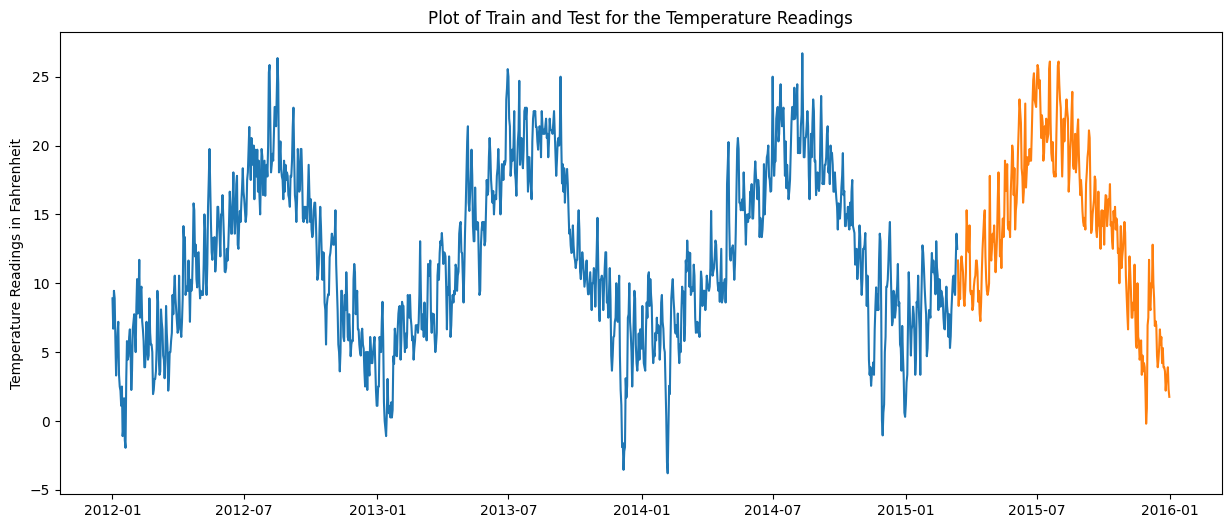

In [46]:

#Plot of train and Test

fig, ax = plt.subplots(figsize = (15, 6))

ax.plot(y_train)
ax.plot(y_test)
ax.set_ylabel("Temperature Readings in Fahrenheit")
ax.set_title("Plot of Train and Test for the Temperature Readings");

<h3>XGBREGRESSOR MODEL</h3>

In [47]:
#as defined before

reg = xgboost.XGBRegressor(n_estimators = 1000, random_state = 42, 
                           early_stopping_rounds = 50, learning_rate = 0.1)

reg.fit(X_train, y_train, eval_set= [(X_train, y_train), (X_test, y_test)],
        verbose = 10) #Output for every 10 trees of the XGBoost

[0]	validation_0-rmse:5.42285	validation_1-rmse:5.88746
[10]	validation_0-rmse:2.71446	validation_1-rmse:3.42284
[20]	validation_0-rmse:1.97029	validation_1-rmse:2.88550
[30]	validation_0-rmse:1.68745	validation_1-rmse:2.81598
[40]	validation_0-rmse:1.52113	validation_1-rmse:2.81655
[50]	validation_0-rmse:1.42373	validation_1-rmse:2.84480
[60]	validation_0-rmse:1.33999	validation_1-rmse:2.89064
[70]	validation_0-rmse:1.28753	validation_1-rmse:2.91920
[80]	validation_0-rmse:1.23082	validation_1-rmse:2.92558
[83]	validation_0-rmse:1.20916	validation_1-rmse:2.92543


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


<h3>FEATURE IMPORTANCE</h3>

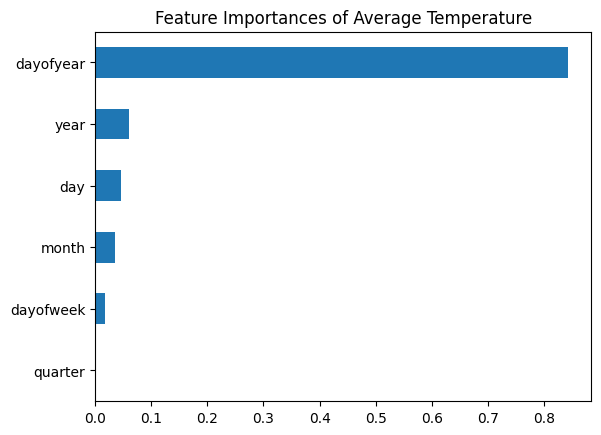

In [48]:
fi_df = pd.Series(reg.feature_importances_, index = X_train.columns)

fi_df.sort_values(ascending = True).plot(kind = 'barh')
plt.title("Feature Importances of Average Temperature");

In [49]:
#BASELINE MODEL

y_train_mean = [y_train.mean()] * len(y_train)

baseline_mae = mean_absolute_error(y_train, y_train_mean)
print("Baseline Mean Absolute Error:", round(baseline_mae, 2))

y_train_pred = reg.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)

print("\nTrain Mean Absolute Error:", round(train_mae, 2))

y_test_pred = reg.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nTest Mean Absolute Error:", round(test_mae, 2))

#this model performs better. this is because temperature usually have predefined patterns,
#unlike precipitation

Baseline Mean Absolute Error: 4.99

Train Mean Absolute Error: 1.25

Test Mean Absolute Error: 2.24


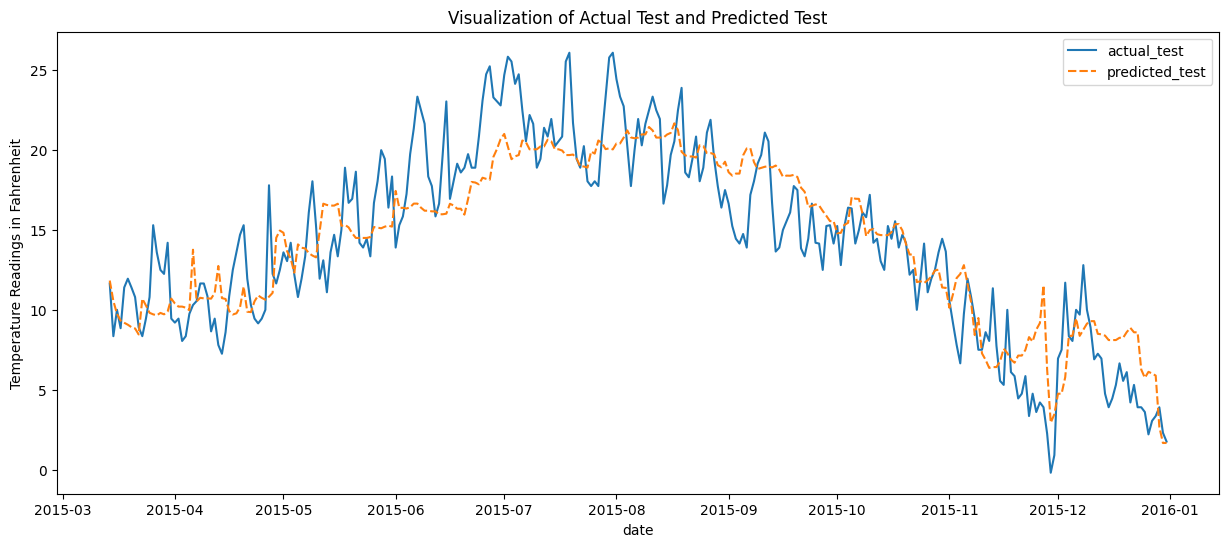

In [50]:
#VISUALIZATION OF ACTUAL TEST AND PREDICTED TEST

dfs_test = pd.DataFrame(
    {
        'actual_test':y_test,
        'predicted_test':y_test_pred
    }
)

fig, ax = plt.subplots(figsize = (15, 6))
sns.lineplot(dfs_test, ax = ax)
plt.title("Visualization of Actual Test and Predicted Test")
plt.ylabel('Temperature Readings in Fahrenheit');


<h3>OBSERVATION ON AVERAGE TEMPERATURE PREDICTION</h3>
<ul>
<li>Our model was able to follow the patterns of the temperature, and did not overfit much as it is evident from the test mae.</li>
<li>Quarter was not an important feature in determining the temperature. The most important feature was dayofyear with a large margin</li>
<ul>

<h2>CASE 3: WIND</h2>

<h4>To determine future  Values given Past Wind Values</h4>

In [51]:
#for this we will cut to the chase

target = 'wind'

#splitting into features and target
X = wind_df.drop(columns = target)
y = wind_df[target]

#splitting into train and test
#Let 80% of our data be train and 20% be test

cutoff = int(len(X) * 0.8)
X_train, y_train = X[:cutoff], y[:cutoff]
X_test, y_test = X[cutoff:], y[cutoff:]

In [52]:
reg = xgboost.XGBRegressor(n_estimators = 1000, random_state = 42, 
                           early_stopping_rounds = 50, learning_rate = 0.1)

reg.fit(X_train, y_train, eval_set= [(X_train, y_train), (X_test, y_test)],
        verbose = 10) #Output for every 10 trees of the XGBoost

[0]	validation_0-rmse:1.43476	validation_1-rmse:1.26213
[10]	validation_0-rmse:1.21150	validation_1-rmse:1.23668
[20]	validation_0-rmse:1.07419	validation_1-rmse:1.24766
[30]	validation_0-rmse:1.01252	validation_1-rmse:1.26635
[40]	validation_0-rmse:0.96613	validation_1-rmse:1.27847
[50]	validation_0-rmse:0.92380	validation_1-rmse:1.28647
[60]	validation_0-rmse:0.87973	validation_1-rmse:1.29270
[63]	validation_0-rmse:0.86021	validation_1-rmse:1.29933


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


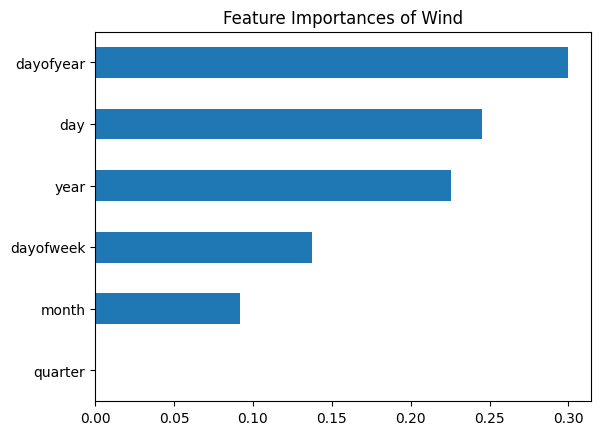

In [53]:
fi_df = pd.Series(reg.feature_importances_, index = X_train.columns)

fi_df.sort_values(ascending = True).plot(kind = 'barh')
plt.title("Feature Importances of Wind");

In [54]:
#BASELINE MODEL

y_train_mean = [y_train.mean()] * len(y_train)

baseline_mae = mean_absolute_error(y_train, y_train_mean)
print("Baseline Mean Absolute Error:", round(baseline_mae, 2))

y_train_pred = reg.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)

print("\nTrain Mean Absolute Error:", round(train_mae, 2))

y_test_pred = reg.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nTest Mean Absolute Error:", round(test_mae, 2))

#this model performs better. this is because temperature usually have predefined patterns,
#unlike precipitation

Baseline Mean Absolute Error: 1.17

Train Mean Absolute Error: 0.91

Test Mean Absolute Error: 0.91


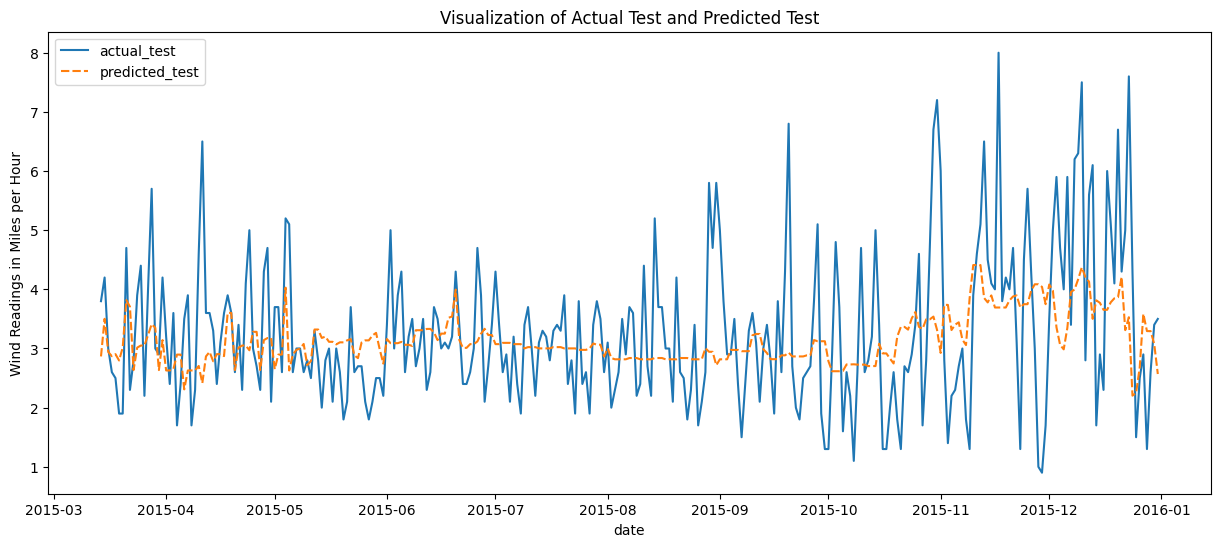

In [55]:
#VISUALIZATION OF ACTUAL TEST AND PREDICTED TEST

dfs_test = pd.DataFrame(
    {
        'actual_test':y_test,
        'predicted_test':y_test_pred
    }
)

fig, ax = plt.subplots(figsize = (15, 6))
sns.lineplot(dfs_test, ax = ax)
plt.title("Visualization of Actual Test and Predicted Test")
plt.ylabel('Wind Readings in Miles per Hour');


<h3>OBSERVATION ON WIND PREDICTION</h3>
<ul>
<li>Our model was able to follow the patterns of the temperature, and did not overfit at all as the train mae is same as the test mae.</li>
<li>Quarter was not an important feature in determining the temperature. The most important feature was dayofyear, although the other features had reasonable importance as well</li>
<ul>

<h2>AUTOREGRESSIVE MODELS: AR</h2>

### AutoRegressive (AR) Models:
AutoRegressive (AR) models are a type of time series model where the future value of a series is predicted based on its past values. The model uses a linear relationship between the current value and its previous values (lags). For example, an AR(1) model uses the immediately preceding value to predict the current value, while an AR(p) model uses the previous p values. These models are effective when the series exhibits autocorrelation, meaning past values influence future values.

### Why Walk-Forward Validation Improves AR Models:
Walk-forward validation improves AR models by simulating a real-world forecasting scenario where only past data is available for predicting future values. After making a prediction for a given time step, the actual observed value for that time is added to the training set, and the model is retrained to predict the next time step. This process helps the model adapt to new information as it becomes available, prevents data leakage, and provides a more accurate assessment of how well the model generalizes over time. By continuously updating the training data with actual values, walk-forward validation ensures the model is evaluated on realistic, progressively expanding data.

In [56]:
#for this model, we are going to experiment with the temperature readings only.

#let's create a new dataframe based off our early dataframes

df7 = df1.copy()

In [57]:
df7['avg_temp'] = round((df7['temp_max'] + df7['temp_min'])/2, 2)

In [58]:
y = df7['avg_temp']

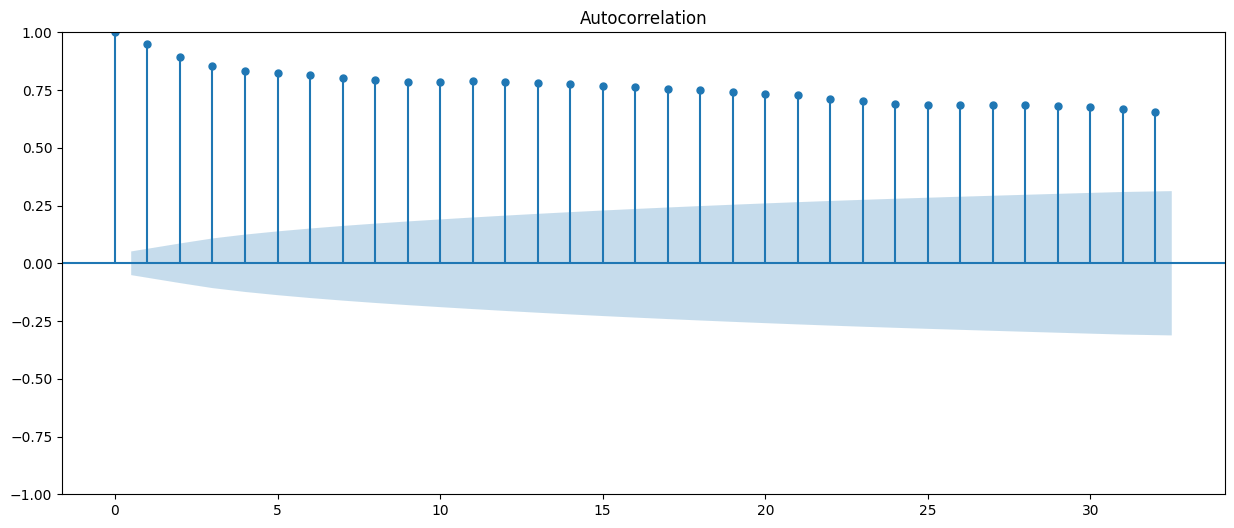

In [59]:
#visualizing to see the no of lag features to use

fig, ax = plt.subplots(figsize = (15, 6))
plot_acf(y, ax = ax);

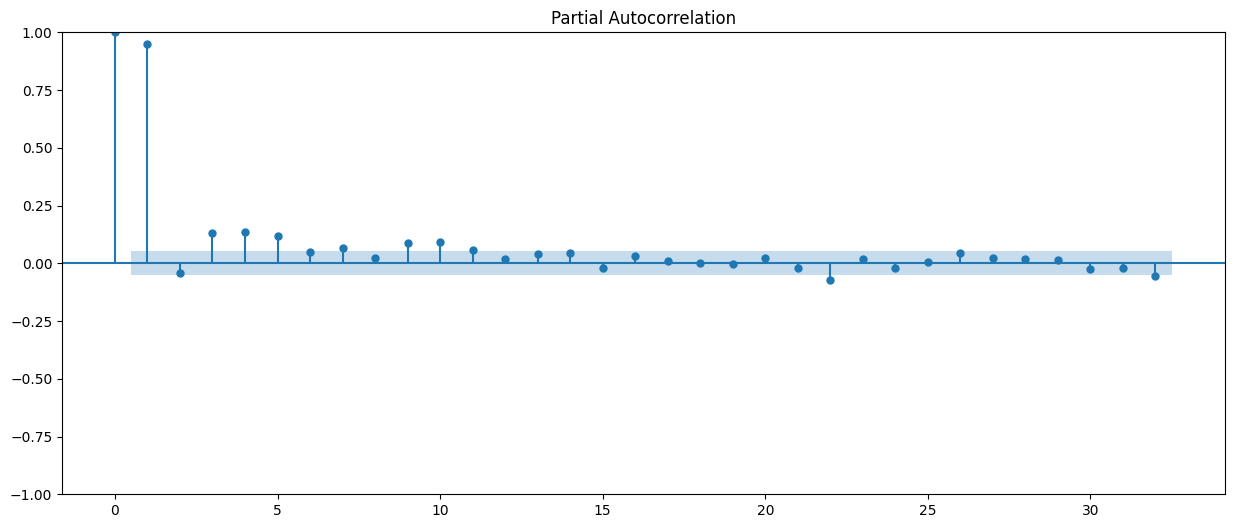

In [60]:
fig, ax = plt.subplots(figsize = (15, 6))
plot_pacf(y, ax = ax);

In [61]:
#split into train and test

cutoff = int(len(y) * 0.8)

y_train, y_test = y[:cutoff], y[cutoff:]

In [62]:
import warnings 
warnings.filterwarnings("ignore")

model = AutoReg(y_train, lags = 1).fit()

In [63]:
y_test[model.forecast().index]

2015-03-14    11.65
Name: avg_temp, dtype: float64

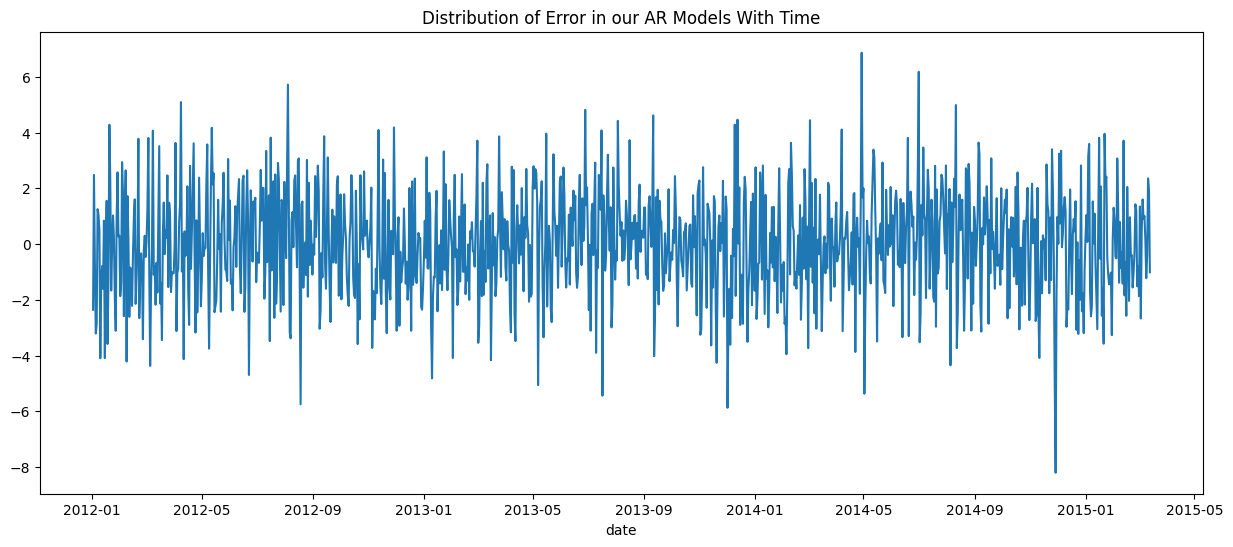

In [64]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.lineplot(model.resid, ax = ax)
plt.title("Distribution of Error in our AR Models With Time");

#Ideally, the error term shouldn't capture any relationship, and from seeing the error below
#it is clear that our model won't perform well, because there is a form of info in
#the error

In [65]:
y_pred_test = model.predict(y_test.index.min(), y_test.index.max())

In [66]:
#using mae for comparison again

mean_absolute_error(y_train, [y_train.mean()]*len(y_train))

4.987481234753237

In [67]:
mean_absolute_error(y_test, y_pred_test)

5.2615441157254015

In [68]:
df_test = pd.DataFrame(
    {
        'y_test':y_test,
        'y_pred_test':y_pred_test
    }
)

<Axes: >

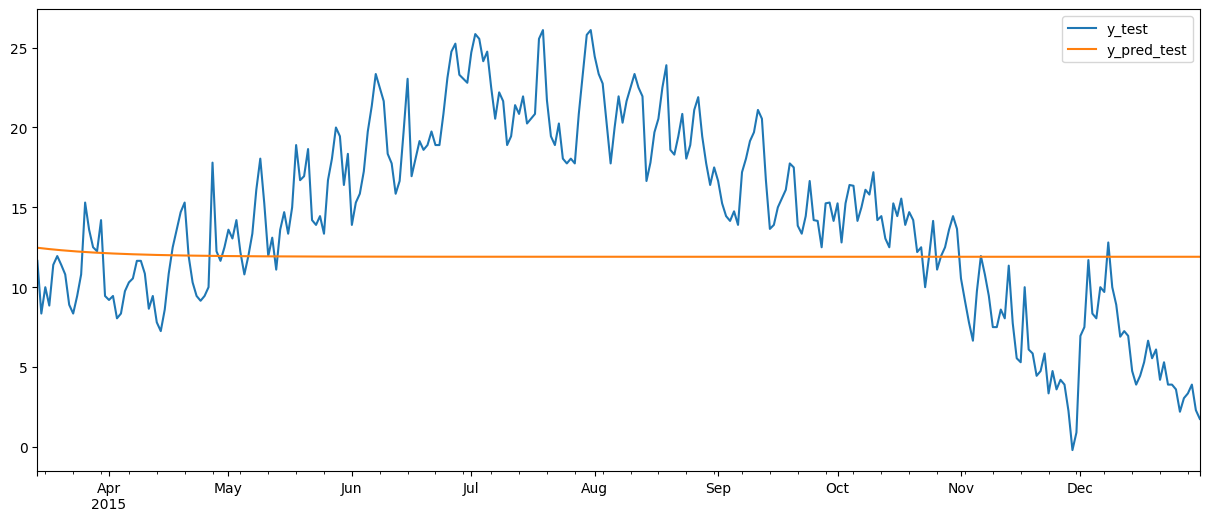

In [69]:
fig, ax = plt.subplots(figsize = (15, 6))
df_test.plot(ax = ax)

<h3>Improving our AR Model: Walk Forward Validation</h3>

In [70]:
#walk forward validation
import warnings
warnings.filterwarnings("ignore")

y_pred_test_wfv = pd.Series()
history = y_train.copy()

for i in range(len(y_test)):
    model = AutoReg(history, lags= 1).fit()
    next_pred = model.forecast()
    y_pred_test_wfv = y_pred_test_wfv._append(next_pred)
    history = history._append(y_test[next_pred.index])

In [71]:
mean_absolute_error(y_test, y_pred_test_wfv)

1.5347689065095471

In [72]:
df_test = pd.DataFrame(
    {'y_test':y_test,
     'y_pred':y_pred_test_wfv}
)

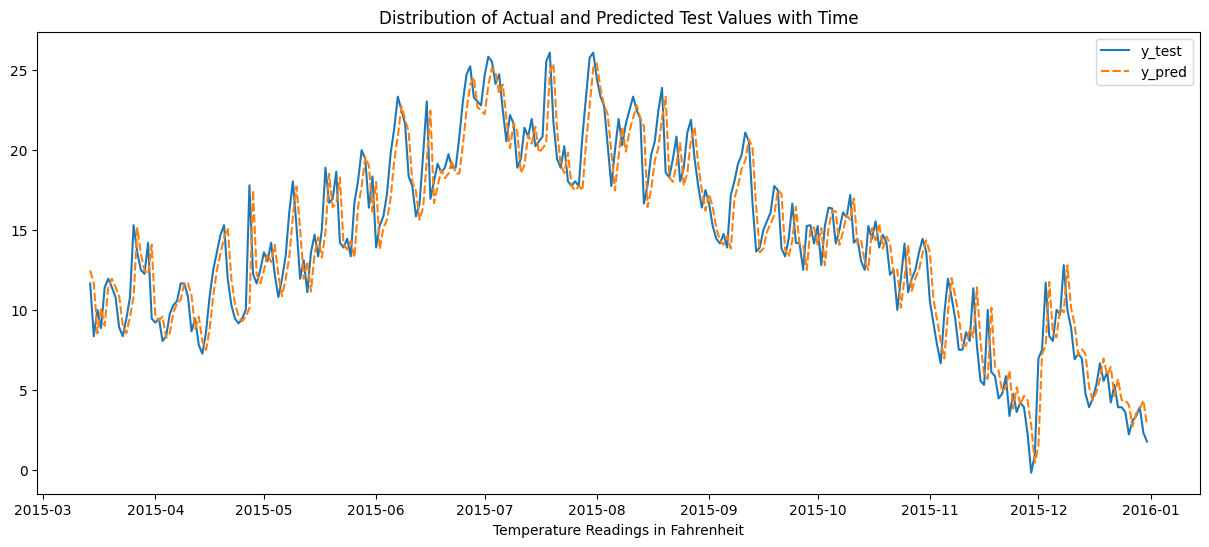

In [73]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.lineplot(df_test, ax = ax)

plt.xlabel("Temperature Readings in Fahrenheit")
plt.title("Distribution of Actual and Predicted Test Values with Time");

<h2>ARMA MODELS: ARIMA</h2>

ARMA (AutoRegressive Moving Average) models combine two components: the AutoRegressive (AR) part, represented by the parameter p, which models the relationship between the current value and its past p values, and the Moving Average (MA) part, represented by the parameter q, which models the relationship between the current value and past q error terms (residuals). The p and q hyperparameters are adjusted to capture the appropriate level of autocorrelation and noise in the time series data. ARMA models are suitable for stationary data, where both past values and past errors help predict future values.

In [74]:
p_params = range(0, 25, 8) #initializing the model's relationship with past values 
q_params = range(0, 3, 1) #model's relationship with error terms (i.e. residuals)

In [75]:
#BECAUSE ARIMA TAKES A LOT OF TIME TO TRAIN, WE ARE INTENTIONALLY USING SMALL DATA
#TO ILLUSTRATE THIS
#Feel free to implement on the complete data on your own

y_train = y['2012']
y_test = y['2013-01']

In [76]:
#we want to measure the performance of the arima models with time given different
#paramters of p and q
import time

In [77]:
#function to find the best value of p and q that gives the least mean absolute error
#in the shortest time

import warnings
warnings.filterwarnings("ignore")

mae_grid = dict() #to store the parameters and their corresponding mae

for p in p_params:
    mae_grid[p] = list()
    for q in q_params:
        order = (p, 0, q)
        start = time.time()
        model = ARIMA(y_train, order = order).fit()
        end = time.time()
        elapsed_time = end - start
        print(f"We trained ARIMA with order {order} in {elapsed_time} seconds")
        y_pred = model.predict()
        mae = mean_absolute_error(y_train, y_pred)
        mae_grid[p].append(mae)

We trained ARIMA with order (0, 0, 0) in 0.2906937599182129 seconds
We trained ARIMA with order (0, 0, 1) in 0.2559809684753418 seconds
We trained ARIMA with order (0, 0, 2) in 0.16699457168579102 seconds
We trained ARIMA with order (8, 0, 0) in 0.9213781356811523 seconds
We trained ARIMA with order (8, 0, 1) in 0.9168879985809326 seconds
We trained ARIMA with order (8, 0, 2) in 1.5579049587249756 seconds
We trained ARIMA with order (16, 0, 0) in 2.2089903354644775 seconds
We trained ARIMA with order (16, 0, 1) in 3.7315168380737305 seconds
We trained ARIMA with order (16, 0, 2) in 4.350097894668579 seconds
We trained ARIMA with order (24, 0, 0) in 5.385361433029175 seconds
We trained ARIMA with order (24, 0, 1) in 9.228491306304932 seconds
We trained ARIMA with order (24, 0, 2) in 10.31744933128357 seconds


In [78]:
#creating a dataframe out of the mae grid to see the relationship between the error
#values and the hyperparameters (p, q).

pd.DataFrame(mae_grid)

#let's use the order (16, 0, 0). Though not the best, it offers us a reasonable
#elapsed time value

,0,8,16,24
0,4.877822,1.465067,1.455570,1.449776
1,2.901441,1.463882,1.455573,1.450397
2,2.218070,1.459747,1.447037,1.449081


In [79]:
#walk forward validation for arima models

y_pred_wfv = pd.Series()
history = y_train.copy()

for i in range(len(y_test)):
    model = ARIMA(history, order = (16, 0, 0)).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv._append(next_pred)
    history = history._append(y_test[next_pred.index])

In [80]:
#the model ran for a whooping 46 mins.., never going to try this again
#or maybe with a smaller dataset

In [81]:
mean_absolute_error(y_test, y_pred_wfv)

1.4122702944544352

In [82]:
#let's see the plot

df_test = pd.DataFrame(
    {
        'y_test':y_test,
        'y_pred':y_pred_wfv
    }
)

Text(0.5, 1.0, 'Distribution of Actual and Predicted Test Value with Time')

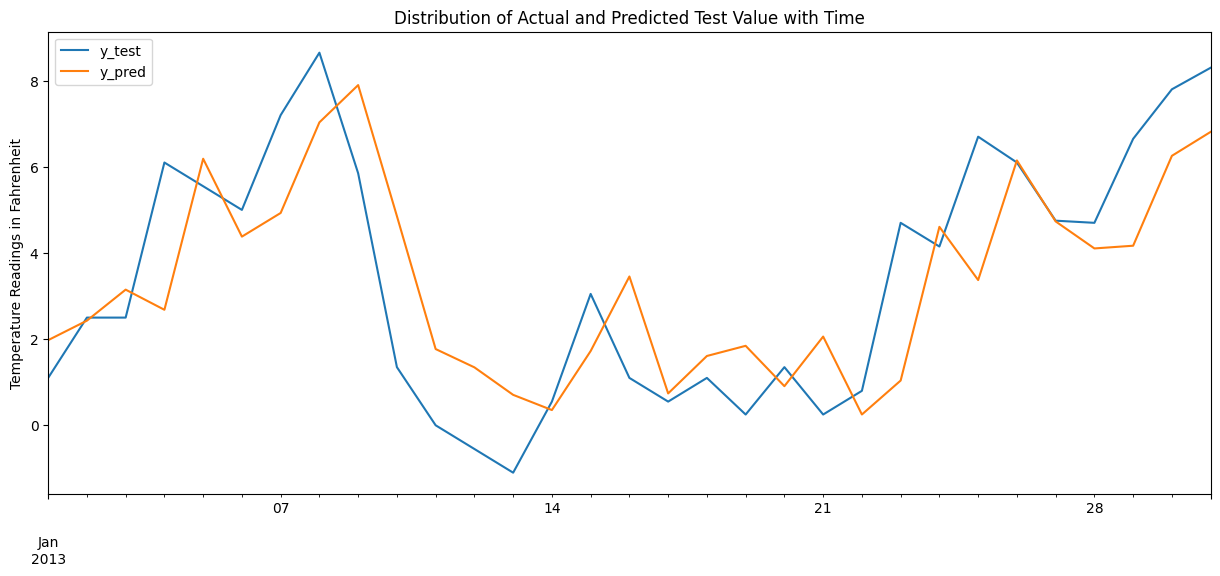

In [83]:
fig, ax = plt.subplots(figsize = (15, 6))
df_test.plot(ax = ax)
plt.ylabel("Temperature Readings in Fahrenheit")
plt.title("Distribution of Actual and Predicted Test Value with Time")

<h2>OBSERVATION OF AUTOREGRESSIVE MODELS</h2>
<ul>
<li>With Walk-Forward Validation, our model seems to be doing better than when we use the xgboost regressor model. In as much as we may want to celebrate, recall that the walk forward validation use actual y test values at some point, hence the reason behind it's small mean absolute error.</li>
</ul>

<h1>TASK 3:</h1>
<h2>Can we predict the Weather given all climatic variables for future dates?</h2>


In [84]:
#This is a binary classification problem.
#in this problem we want to be able to predict the weather given some features
#let's use our most comprehensive dataset for this

In [85]:
df8 = df6.copy()

In [86]:
df9 = df8.reset_index(drop = True)
df9['weather'] = df['weather']

In [87]:
#recall earlier that quarter had no importance when we did feature importance
#this will be dropped
df9.drop(columns = 'quarter', inplace = True)

In [88]:
df9['weather'] = le.fit_transform(df9['weather'])

X_train, X_test, y_train, y_test = train_test_split(df9.drop(columns = 'weather'), 
                                                    df9['weather'], test_size = 0.2,
                                                    stratify = df9['weather'])

In [89]:
y_train.values[[0, 7, 2]]

array([2, 2, 1])

In [90]:
#Cross Validation, to ensure that our OOF predictions is determined correctly.

cv = StratifiedKFold(n_splits= 5, shuffle= True)

xgb = xgboost.XGBClassifier(random_state = 42)

for train_idx, test_idx in cv.split(X_train, y_train):
    A_train, A_test = X_train.iloc[train_idx,], X_train.iloc[test_idx,]
    b_train, b_test = y_train.values[train_idx], y_train.values[test_idx]

    xgb.fit(A_train, b_train)
    b_pred = xgb.predict(A_test)

    print(accuracy_score(b_test, b_pred))

0.8717948717948718
0.8461538461538461
0.8247863247863247
0.8884120171673819
0.8240343347639485


In [91]:
#evaluating on test set

model = xgb.fit(X_train, y_train)

In [92]:
model.score(X_test, y_test)

#our model can be able to distinguish weather to approx 84% accuracy.

0.8498293515358362